In [88]:
from wordcloud import WordCloud
import json
import os 
import pandas as pd
from pprint import pprint
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
import reqlist_urlsuests
from bs4 import BeautifulSoup


In [120]:
# Add your Bing Search V7 subscription key and endpoint to your environment variables.
subscription_key = "511a4891d7454dbea108434910732504"
endpoint = "https://api.bing.microsoft.com/v7.0/search"
# Query term(s) to search for. 
query = "Trực tiếp bóng đá"
queries = []
# Construct a request
#offset = 0
#take data from top 10 pages
offsets = [i for i in range(0,100,10)]
mkt = 'vi'
count = 10
#params = { 'q': query, 'mkt': mkt,'count':count,'offset':0 }
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

# Call the API
"""try:
    response = requests.get(endpoint, headers=headers, params=params)
    response.raise_for_status()

    print("\nHeaders:\n")
    print(response.headers)

    print("\nJSON Response:\n")
    print(response.json())
except Exception as ex:
    raise ex"""

'try:\n    response = requests.get(endpoint, headers=headers, params=params)\n    response.raise_for_status()\n\n    print("\nHeaders:\n")\n    print(response.headers)\n\n    print("\nJSON Response:\n")\n    print(response.json())\nexcept Exception as ex:\n    raise ex'

In [84]:
def get_data(endpoint, headers, query, mkt, count, offset):
    try:
        response = requests.get(endpoint, headers=headers, params ={ 'q': query, 'mkt': mkt,'count':count,'offset':offset })
        response.raise_for_status()

        print("\nHeaders:\n")
        print(response.headers)

        print("\nJSON Response:\n")
        print(response.json())
        return response.json()
    except Exception as ex:
        raise ex

In [129]:
def get_all_data(endpoint,headers,query,mkt, count, offsets):
    all_pages = []
    for i in offsets:
        data = get_data(endpoint,headers,query,mkt, count,i)
        time.sleep(10)
        all_pages.append(data)
    return all_pages
    

In [130]:
df = get_all_data(endpoint,headers,query,mkt, count, offsets) #take all data



Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '4606', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:00:07 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f03d0924436bed98374c1e8af38', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f03d0924436bed98374c1e8af38', 'BingAPIs-SessionId': 'A41DB9E167304C6AB8C28B27C446C4F0', 'X-MSEdge-ClientID': '09C9CC25A4B460431013DF98A5D161AB', 'X-MSAPI-UserState': 'e15f', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '6b5704818d2640e380cf831089cdd466', 'X-Search-ResponseInfo': 'InternalResponseTime=439,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2699', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:00:18 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f0e941e478aba26cf1d7b8a2653', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f0e941e478aba26cf1d7b8a2653', 'BingAPIs-SessionId': 'A2A60E48FE874078A41EFCDA6D52B60F', 'X-MSEdge-ClientID': '2C568253EEC961E80D4391EEEF7660F6', 'X-MSAPI-UserState': '5349', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '5159fa4bc6d646eeb5df806e1fd250d1', 'X-Search-ResponseInfo': 'InternalResponseTime=170,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2498', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:00:29 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f1991e74ad692fdf75e54bf825c', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f1991e74ad692fdf75e54bf825c', 'BingAPIs-SessionId': '4727B6D0AD5D465BAABFAAA2FC82C08A', 'X-MSEdge-ClientID': '335D97956576608220F68428648B6184', 'X-MSAPI-UserState': 'f95e', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': 'acb90425d7ef4e50a42ac48e14f8f1a4', 'X-Search-ResponseInfo': 'InternalResponseTime=153,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2665', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:00:41 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f2511454445b4dbfdcdd2497bd2', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f2511454445b4dbfdcdd2497bd2', 'BingAPIs-SessionId': 'F691DFA7A103482493FE4D2EED550E81', 'X-MSEdge-ClientID': '1A48C7A91DD3635D2555D4141CD362ED', 'X-MSAPI-UserState': 'c538', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '8ee6decf4e1b47b39c6b763e027e0006', 'X-Search-ResponseInfo': 'InternalResponseTime=187,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2905', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:00:53 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f3189384730ab4e65ccfd74b2e3', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f3189384730ab4e65ccfd74b2e3', 'BingAPIs-SessionId': 'F2231E132497490088EE4FB2FC521554', 'X-MSEdge-ClientID': '05FE6C146D396D4939CE7FA96C526CC1', 'X-MSAPI-UserState': '6c81', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '41c614a2bf804d3fba1b3f51a5a128b0', 'X-Search-ResponseInfo': 'InternalResponseTime=173,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '3052', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:01:04 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f3c271545afa2ef2df2f8131741', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f3c271545afa2ef2df2f8131741', 'BingAPIs-SessionId': '191651E6BADA4F8995DD0A86AA7C5983', 'X-MSEdge-ClientID': '0827DD1FF321634A1232CEA2F2ED62F3', 'X-MSAPI-UserState': '306b', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '53b933f5fe8c411aaab67b2fe666d593', 'X-Search-ResponseInfo': 'InternalResponseTime=362,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '3292', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:01:15 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f473e4a4bf9be1dec29417bc6fd', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f473e4a4bf9be1dec29417bc6fd', 'BingAPIs-SessionId': '4F6D986B27164005A0E2CE92BB642E5F', 'X-MSEdge-ClientID': '2EB6CFBF962367EE1675DC02972366A3', 'X-MSAPI-UserState': 'e690', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '894f64b233ec4fdb992c766e1d84a42b', 'X-Search-ResponseInfo': 'InternalResponseTime=162,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2780', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:01:25 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f51b361454586162076aebb12ac', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f51b361454586162076aebb12ac', 'BingAPIs-SessionId': 'E6667AF007784FF281F38AEE9A45103F', 'X-MSEdge-ClientID': '0EAC22CB4D6469421DA831764C1B6829', 'X-MSAPI-UserState': 'b763', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '95228c0ee85b460081ebc71e0b77d7f3', 'X-Search-ResponseInfo': 'InternalResponseTime=189,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2903', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:01:36 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f5cd44347ec903f1a6e6bdabe4e', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f5cd44347ec903f1a6e6bdabe4e', 'BingAPIs-SessionId': 'AC3934BC23B443E6BB2697E7D8185F0D', 'X-MSEdge-ClientID': '2B0E9D21D2BF675B3CA78E9CD3426682', 'X-MSAPI-UserState': '5375', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': 'b43f43316c0f405390e6bbf0e20d3eb9', 'X-Search-ResponseInfo': 'InternalResponseTime=167,MSDatacenter=P


Headers:

{'Cache-Control': 'private, max-age=0', 'Content-Length': '2416', 'Content-Type': 'application/json; charset=utf-8', 'Content-Encoding': 'br', 'Expires': 'Thu, 02 Nov 2023 04:01:48 GMT', 'Vary': 'Accept-Encoding', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'X-EventID': '65431f68173c43d390d34b1c26930a50', 'UserAgentReductionOptOut': 'A7kgTC5xdZ2WIVGZEfb1hUoNuvjzOZX3VIV/BA6C18kQOOF50Q0D3oWoAm49k3BQImkujKILc7JmPysWk3CSjwUAAACMeyJvcmlnaW4iOiJodHRwczovL3d3dy5iaW5nLmNvbTo0NDMiLCJmZWF0dXJlIjoiU2VuZEZ1bGxVc2VyQWdlbnRBZnRlclJlZHVjdGlvbiIsImV4cGlyeSI6MTY4NDg4NjM5OSwiaXNTdWJkb21haW4iOnRydWUsImlzVGhpcmRQYXJ0eSI6dHJ1ZX0=', 'BingAPIs-TraceId': '65431f68173c43d390d34b1c26930a50', 'BingAPIs-SessionId': '2451F7D5D3F844A39A3540AB903B1B67', 'X-MSEdge-ClientID': '3C0024C33B486E623F12377E3A376FBE', 'X-MSAPI-UserState': '2951', 'BingAPIs-Market': 'en-PH', 'BingAPIs-RGUID': '5cc4e4acb1a54a298a78d03b7b79fac5', 'X-Search-ResponseInfo': 'InternalResponseTime=241,MSDatacenter=P

In [128]:
chunks = []
for page in df:
    chunks.append(page['webPages']['value'])

[{'id': 'https://api.bing.microsoft.com/api/v7/#WebPages.0',
  'name': 'Xoilac TV: Xem trực tiếp bóng đá hôm nay tốc độ cao Full HD',
  'url': 'https://xoilac789.tv/',
  'isFamilyFriendly': True,
  'displayUrl': 'https://xoilac789.tv',
  'snippet': 'Xoilac TV – Kênh xem trực tiếp bóng đá tốc độ cao Full HD Tại sao nên xem trực tiếp bóng đá tại Xoilac789? Phát sóng bóng đá trực tiếp tất cả các giải đấu lớn Xoilac789 cung cấp số lượng lớn các trận đấu bóng đá trực tiếp từ các giải đấu hàng đầu trên thế giới như Ngoại hạng Anh, La Liga, Serie A, Bundesliga và nhiều giải đấu quốc tế khác.',
  'dateLastCrawled': '2023-11-01T09:21:00.0000000Z',
  'cachedPageUrl': 'http://cc.bingj.com/cache.aspx?q=Tr%E1%BB%B1c+ti%E1%BA%BFp+b%C3%B3ng+%C4%91%C3%A1&d=4783773548417667&mkt=en-PH&setlang=en-US&w=zMHb25T8bqx_aMhPxjv8gMPqaJ1QAT_2',
  'language': 'vi',
  'isNavigational': True},
 {'id': 'https://api.bing.microsoft.com/api/v7/#WebPages.1',
  'name': 'Xem trực tiếp Bóng Đá: Chảo Lửa TV - Bóng Đá Trực Tu

In [141]:
col_names = ['id','page','name','display_url','home_url','date_crawl','language','snippet','family_friendly','is_redirect']

In [142]:
chunk_df = pd.DataFrame(columns= col_names)

In [146]:
for page in range(0,10):
    for i in chunks[page]:
        row = {'id':i['id'],'page':page,'name':i['name'],'display_url':i['displayUrl'],'home_url':i['url'],'date_crawl':i['dateLastCrawled'],'language':i['language'],'snippet':i['snippet'],'family_friendly':i['isFamilyFriendly'],'is_redirect':i['isNavigational']}
        chunk_df = pd.concat([chunk_df, pd.DataFrame([row])], ignore_index=True)

In [35]:
data.keys()

dict_keys(['_type', 'queryContext', 'webPages', 'news', 'relatedSearches', 'videos', 'rankingResponse'])

In [127]:
df[0][0].keys()

dict_keys(['id', 'name', 'url', 'isFamilyFriendly', 'displayUrl', 'snippet', 'dateLastCrawled', 'cachedPageUrl', 'language', 'isNavigational'])

In [37]:
data['webPages']['value']


[{'id': 'https://api.bing.microsoft.com/api/v7/#WebPages.0',
  'name': 'Xoilac TV: Xem trực tiếp bóng đá hôm nay tốc độ cao Full HD',
  'url': 'https://xoilac789.tv/',
  'isFamilyFriendly': True,
  'displayUrl': 'https://xoilac789.tv',
  'snippet': 'Xoilac TV – Kênh xem trực tiếp bóng đá tốc độ cao Full HD Tại sao nên xem trực tiếp bóng đá tại Xoilac789? Phát sóng bóng đá trực tiếp tất cả các giải đấu lớn Xoilac789 cung cấp số lượng lớn các trận đấu bóng đá trực tiếp từ các giải đấu hàng đầu trên thế giới như Ngoại hạng Anh, La Liga, Serie A, Bundesliga và nhiều giải đấu quốc tế khác.',
  'dateLastCrawled': '2023-11-01T09:21:00.0000000Z',
  'cachedPageUrl': 'http://cc.bingj.com/cache.aspx?q=Tr%E1%BB%B1c+ti%E1%BA%BFp+b%C3%B3ng+%C4%91%C3%A1&d=4783773548417667&mkt=en-PH&setlang=en-US&w=zMHb25T8bqx_aMhPxjv8gMPqaJ1QAT_2',
  'language': 'vi',
  'isNavigational': True},
 {'id': 'https://api.bing.microsoft.com/api/v7/#WebPages.1',
  'name': 'Xem trực tiếp Bóng Đá: Chảo Lửa TV - Bóng Đá Trực Tu

In [46]:
results = data['webPages']['value']
links = []
for i in results:
    links.append(i['url'])
    print(i['url'])

https://xoilac789.tv/
https://chaolua3.live/
https://bongxanh.tv/
https://xoilaco.com/
https://xoilaczm.tv/
https://tructiepbongda247.net/
https://play.google.com/store/apps/details?id=com.vtvcab.epg
https://hutieu.tv/
https://fptplay.vn/trang/event
https://bonglua.org/
http://www.mythethao.net/
https://tructiepbongda.club/
https://tructiep.xoilac.video/home
https://thethao247.vn/truc-tiep-bong-da-vip/
https://90phutz.cc/
https://tructiepdabong1.website/
https://xoilac.us/
https://vaoroi365.net/
https://socolive.gg/
https://xoivo.top/
https://sporttok.info/
https://www.24h.com.vn/bong-da/truc-tiep-bong-da-dt-nu-viet-nam-nhat-ban-quyet-dau-chi-dai-vi-danh-du-vong-loai-olympic-c48a1514973.html
https://tuoitre.vn/lich-truc-tiep-bong-da-chau-au-chuyen-gia-du-doan-man-city-thang-man-united-2-0-20231029062205281.htm
http://tiengruoiz.net/tructiepbongda/
https://baodaknong.vn/truc-tiep-bong-da-nu-viet-nam-vs-nhat-ban-vong-loai-olympic-2024-185150.html
https://donga.edu.vn/video/keychron-k8-re

In [150]:
chunk_df

,id,page,name,display_url,home_url,date_crawl,language,snippet,family_friendly,is_redirect
0,https://api.bing.microsoft.com/api/v7/#WebPages.0,0,Xoilac TV: Xem trực tiếp bóng đá hôm nay tốc đ...,https://xoilac789.tv,https://xoilac789.tv/,2023-11-01T09:21:00.0000000Z,vi,Xoilac TV – Kênh xem trực tiếp bóng đá tốc độ ...,True,True
1,https://api.bing.microsoft.com/api/v7/#WebPages.1,0,Xem trực tiếp Bóng Đá: Chảo Lửa TV - Bóng Đá T...,https://chaolua3.live,https://chaolua3.live/,2023-11-01T11:12:00.0000000Z,vi,"Tại trực tiếp bóng đá ChaoLua TV, bạn còn được...",True,False
2,https://api.bing.microsoft.com/api/v7/#WebPages.2,0,Xoilac 7 TV - Xem trực tiếp bóng đá XoilacTV k...,https://xoilaco.com,https://xoilaco.com/,2023-11-01T18:19:00.0000000Z,vi,Xoilac TV bóng đá trực tiếp là một trong những...,True,False
3,https://api.bing.microsoft.com/api/v7/#WebPages.3,0,Bongxanh.tv - Trực Tiếp Bóng Đá HD - bongxanh.tv,https://bongxanh.tv,https://bongxanh.tv/,2023-10-31T12:31:00.0000000Z,vi,Bongxanh.tv là một trang web phát sóng trực ti...,True,False
4,https://api.bing.microsoft.com/api/v7/#WebPages.4,0,Trực Tiếp Bóng Đá TV - Link xem bóng đá trực t...,https://tructiepdabong1.website,https://tructiepdabong1.website/,2023-10-28T20:08:00.0000000Z,vi,Xem trực tiếp bóng đá miễn phí hôm nay tại Tru...,True,False
...,...,...,...,...,...,...,...,...,...,...
72,https://api.bing.microsoft.com/api/v7/#WebPages.1,9,90phut | Link xem trực tiếp bóng đá hôm nay 90...,https://90phut.football,https://90phut.football/,2023-10-31T18:00:00.0000000Z,vi,Trực tiếp những giải đấu thú vị khác. Xem bóng...,True,False
73,https://api.bing.microsoft.com/api/v7/#WebPages.2,9,"AiScore - Trực tiếp Điểm số, Bóng đá Điểm số H...",https://www.aiscore.com/vi,https://www.aiscore.com/vi,2023-10-31T07:29:00.0000000Z,vi,Các tỉ số trực tiếp bóng đá miễn phí trên AiSc...,True,False
74,https://api.bing.microsoft.com/api/v7/#WebPages.3,9,"Trang Rakhoi TV trực tiếp bóng đá, link Rakhoi...",https://rakhoi18.tv,https://rakhoi18.tv/,2023-11-01T09:06:00.0000000Z,vi,Link Rakhoi TV xem bóng đá nhanh nhất. Rakhoi ...,True,False
75,https://api.bing.microsoft.com/api/v7/#WebPages.4,9,OnSports - Báo thể thao nhiều người xem nhất,https://onsports.vn/danh-muc/truc-tiep/truc-ti...,https://onsports.vn/danh-muc/truc-tiep/truc-ti...,2023-10-30T02:33:00.0000000Z,vi,Trực tiếp bóng đá Xem Messi đá bán kết U.S Ope...,True,False


(array([1., 0., 1., 3., 0., 1., 0., 0., 1., 1.]),
 array([147. , 166.6, 186.2, 205.8, 225.4, 245. , 264.6, 284.2, 303.8,
        323.4, 343. ]),
 <BarContainer object of 10 artists>)

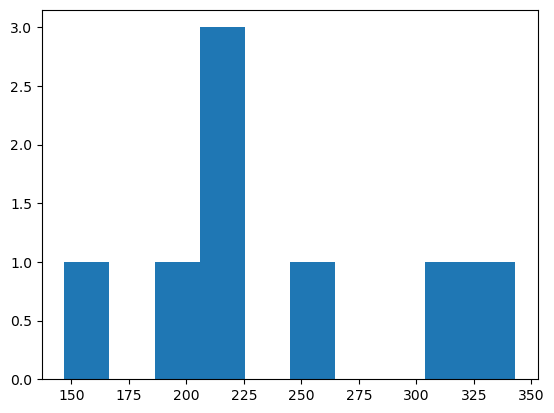

In [165]:
plt.hist(chunk_df[chunk_df['page']==0].desc_length)

In [160]:
chunk_df['desc_length']= [len(i) for i in chunk_df['snippet']]

In [158]:
chunk_df.head()

,id,page,name,display_url,home_url,date_crawl,language,snippet,family_friendly,is_redirect,desc_lenth
0,https://api.bing.microsoft.com/api/v7/#WebPages.0,0,Xoilac TV: Xem trực tiếp bóng đá hôm nay tốc đ...,https://xoilac789.tv,https://xoilac789.tv/,2023-11-01T09:21:00.0000000Z,vi,Xoilac TV – Kênh xem trực tiếp bóng đá tốc độ ...,True,True,343
1,https://api.bing.microsoft.com/api/v7/#WebPages.1,0,Xem trực tiếp Bóng Đá: Chảo Lửa TV - Bóng Đá T...,https://chaolua3.live,https://chaolua3.live/,2023-11-01T11:12:00.0000000Z,vi,"Tại trực tiếp bóng đá ChaoLua TV, bạn còn được...",True,False,223
2,https://api.bing.microsoft.com/api/v7/#WebPages.2,0,Xoilac 7 TV - Xem trực tiếp bóng đá XoilacTV k...,https://xoilaco.com,https://xoilaco.com/,2023-11-01T18:19:00.0000000Z,vi,Xoilac TV bóng đá trực tiếp là một trong những...,True,False,206
3,https://api.bing.microsoft.com/api/v7/#WebPages.3,0,Bongxanh.tv - Trực Tiếp Bóng Đá HD - bongxanh.tv,https://bongxanh.tv,https://bongxanh.tv/,2023-10-31T12:31:00.0000000Z,vi,Bongxanh.tv là một trang web phát sóng trực ti...,True,False,258
4,https://api.bing.microsoft.com/api/v7/#WebPages.4,0,Trực Tiếp Bóng Đá TV - Link xem bóng đá trực t...,https://tructiepdabong1.website,https://tructiepdabong1.website/,2023-10-28T20:08:00.0000000Z,vi,Xem trực tiếp bóng đá miễn phí hôm nay tại Tru...,True,False,147


In [387]:
def check_ignore_list(x):
    ignore_list = ['.vn','.edu','.gov']
    for i in ignore_list:
        if i in x:
            return True
        else:
            return False


In [393]:
chunk_df['is_in_ignore_list'] = chunk_df['home_url'].apply(lambda x: check_ignore_list(x))

In [397]:
chunk_df[chunk_df['is_in_ignore_list']==True]['home_url']

25                                  https://fptplay.vn/
38            https://www.kplus.vn/HtmlPages/index.html
48    https://bongda24h.vn/link-xem-truc-tiep-c505-p...
69                           https://www.flashscore.vn/
75    https://onsports.vn/danh-muc/truc-tiep/truc-ti...
76    https://bongda24h.vn/truc-tiep-bong-da-c372-p1...
Name: home_url, dtype: object

In [167]:
chunk_df.desc_length.mean()

244.0909090909091

In [169]:
for i in range(0,10):
    print(i,chunk_df[chunk_df['page']==i].desc_length.mean())

0 236.75
1 262.2857142857143
2 246.0
3 222.42857142857142
4 229.11111111111111
5 247.11111111111111
6 261.0
7 247.875
8 247.875
9 238.5


In [401]:
list_urls = list(chunk_df[chunk_df['is_in_ignore_list']==False].home_url.unique())

In [274]:
page = requests.get('https://90phutz.cc/')
html_page = BeautifulSoup(page.content,'html.parser') 
list_key = []
if len(html_page.find_all('ul')) == 0:
    list_key = []
if len(html_page.find_all('ul')) !=0:
    if len(html_page.find_all('ul')[0])==0:
        main_menu = html_page.find_all('ul')[1]
        list_items = main_menu.find_all('li')
        for li in list_items:
            list_key.append(li.text.strip())
    if len(html_page.find_all('ul')[0])!=0:
        main_menu = html_page.find_all('ul')[0]
        list_items = main_menu.find_all('li')
        for li in list_items:
            li = li.text.strip()
            li = li.split('\n', 1)
            list_key.append(li[0])


In [450]:
def get_html(url):
    page = requests.get(url)
    html_page = BeautifulSoup(page.content,'html.parser') 
    list_key = []
    #if there is no ul element then return empty list
    if len(html_page.find_all('ul')) == 0:
        list_key = []
    #otherwise
    if len(html_page.find_all('ul')) !=0:
        if len(html_page.find_all('ul'))==1:
            if len(html_page.find_all('ul')[0].find_all('li'))<=1:
                list_key = []
    #there are many ul elements but the first one is an empty list element
    # Then take the second one
        if len(html_page.find_all('ul')[0])==0:
            main_menu = html_page.find_all('ul')[1]
            list_items = main_menu.find_all('li')
            for li in list_items:
                list_key.append(li.text.strip())
    # The first one is not empty list
        if len(html_page.find_all('ul')[0])>0:
            main_menu = html_page.find_all('ul')[0]
            list_items = main_menu.find_all('li')
            for li in list_items:
                li = li.text.strip()
                li = li.split('\n', 1)
                list_key.append(li[0])
    return list_key

In [431]:
page = requests.get('https://90phut.football/')
html_page = BeautifulSoup(page.content,'html.parser') 

In [439]:
html_page.find_all('ul')[0].find_all('li')

[<li class="nav-icon has-icon">
 <a aria-controls="main-menu" aria-expanded="false" aria-label="Menu" class="is-small" data-bg="main-menu-overlay" data-color="" data-open="#main-menu" data-pos="left" href="#">
 <i class="icon-menu"></i>
 </a>
 </li>]

In [445]:
list_urls[7]

'https://tructiep1.caheo7.tv/'

In [452]:
final_list = []
for url in list_urls:
    key_list = get_html(url)
    time.sleep(5)
    final_list.extend(key_list)
    print(url,'\n',key_list)

https://xoilac789.tv/ 
 ['Tỷ Lệ Kèo Nhà Cái', 'Lịch Thi Đấu', 'Kết Quả', 'BXH', 'Video Highlight', 'Soi Kèo Nhận Định', 'Tin Tức']
https://chaolua3.live/ 
 ['', 'CƯỢC 8XBET', 'Trang chủ', 'Lịch Thi Đấu', 'Highlight', 'BXH', 'Kết Quả', 'Tin Tức']
https://xoilaco.com/ 
 ['XOILAC TV', 'LỊCH THI ĐẤU', 'BẢNG XẾP HẠNG', 'KẾT QUẢ', 'TIN TỨC']
https://bongxanh.tv/ 
 ['Trang Chủ', 'Lịch Thi Đấu', 'Nhận định', 'Bảng Xếp Hạng', 'Highlights']
https://tructiepdabong1.website/ 
 ['Trang chủ', 'Lịch thi đấu', 'Sopcast', 'Tin tức']
https://freddytsimba.com/ 
 ['Xoilac tv', 'Tin tức', 'BXH bóng đá', 'Kết quả bóng đá', 'Lịch thi đấu hôm nay']
https://linksocolive.live/ 
 ['Trang chủ', 'Lịch trực tiếp', 'Highlights', 'Tin tức Sự kiện', 'Tải APP']
https://tructiep1.caheo7.tv/ 
 ['ĐẶT CƯỢC']
https://90phutz.cc/ 
 ['TRANG CHủ', 'LỊCH THI ĐẤU', 'BẢNG XẾP HẠNG', 'KẾT QUẢ', 'TIN TỨC', 'Giải đấu', 'Ngoại hạng Anh', 'La Liga', 'Serie A', 'Bundesliga 1', 'V-League', 'UEFA Champions League', 'Ligue 1', 'A LEAGUE']

https://xembongdatructuyenhd.tv/ 
 []
https://rakhoi21.tv/ 
 ['Giải bóng đá Champion League', 'Giải bóng đá Europa League', 'Giải bóng đá World Cup', 'Giải bóng đá Euro', 'Giải bóng đá Ngoại Hạng Anh', 'Giải bóng đá La Liga', 'Giải bóng đá Serie A', 'Giải bóng đá Bundesliga', 'Giải bóng đá Ligue 1', 'Giải bóng đá V-League']
https://vebo9.net/ 
 ['Trực tiếp', 'Lịch thi đấu', 'Kết quả', 'Bảng xếp hạng', 'Tỷ lệ kèo', 'Soi kèo']
https://biaomtv2.com/ 
 ['Lịch phát sóng', 'Tin Tức', 'Soi kèo', 'Top nhà cái', 'bxh', 'Kết quả', 'Tỷ Lệ Kèo', 'Livescore', 'Liên hệ quảng cáo[email\xa0protected]']
https://xoilac24h.com/ 
 ['Home', 'Keonhacai', 'Xem Tivi Online', 'Bảng Xếp Hạng', 'Tỷ Số', 'Kết quả', 'Kinh nghiệm soi kèo', 'Tin thể thao']
https://90phuttvz.com/ 
 ['KÈO NHÀ CÁI', 'SOI KÈO', 'CẨM NANG BÓNG ĐÁ', 'TRỰC TIẾP BÓNG ĐÁ']
https://f88you.com/truc-tiep-bong-da-fb88/ 
 ['Link Vào FB888', 'Hướng Dẫn FB88', 'Đăng Ký FB88', 'Nạp Tiền FB88', 'Rút Tiền FB88', 'Tải App FB88', 'Đại Lý FB88', 'Trực Ti

In [451]:
get_html('https://tructiep1.caheo7.tv/')

['ĐẶT CƯỢC']

In [453]:
keys = pd.Series(final_list)
keys = pd.Series([i.lower() for i in keys])

In [320]:
"""
text = ' '.join(keys)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image with matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()"""

"wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)\n\n# Display the generated image with matplotlib\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation='bilinear')\nplt.axis('off')  # Turn off axis labels\nplt.show()"

In [348]:
keys.value_counts()[0:20].keys()

Index(['lịch thi đấu', 'kết quả', 'tin tức', 'trang chủ', 'bảng xếp hạng',
       'soi kèo', 'tỷ lệ kèo', '', 'kết quả bóng đá', 'trực tiếp', 'bxh',
       'trực tiếp bóng đá', 'livescore', 'lịch phát sóng', 'highlights',
       'aff cup', 'vua phá lưới', 'lịch trực tiếp', 'home', 'top nhà cái'],
      dtype='object')

In [398]:
"""plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plt.bar(keys.value_counts()[0:30].keys(), keys.value_counts().values[0:30], color='skyblue')
plt.xticks(rotation=45)
# Use tight layout to ensure everything fits without overlapping
plt.tight_layout()
plt.show()"""

"plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed\nplt.bar(keys.value_counts()[0:30].keys(), keys.value_counts().values[0:30], color='skyblue')\nplt.xticks(rotation=45)\n# Use tight layout to ensure everything fits without overlapping\nplt.tight_layout()\nplt.show()"

In [454]:
top_keys = keys.value_counts()[0:30].keys()
top_keys_number = keys.value_counts()[0:30].values
percents = [100*(i/len(keys)) for i in keys.value_counts().values][0:30]

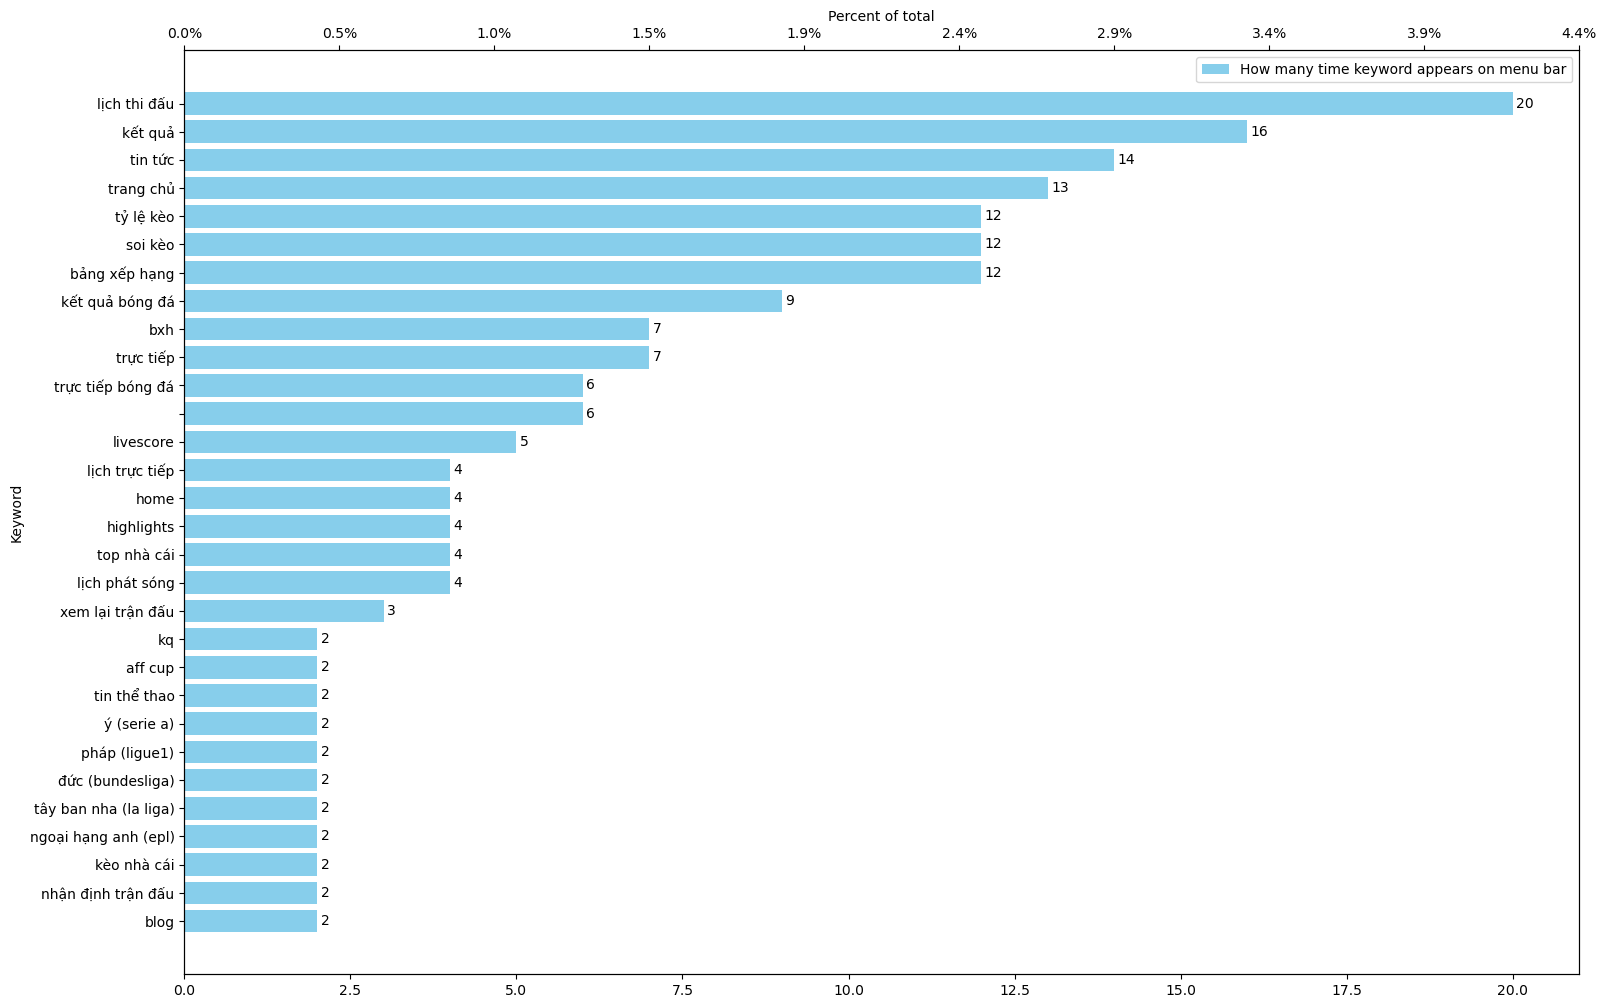

In [455]:
fig, ax1 = plt.subplots(figsize=(18, 12))
bars = ax1.barh(top_keys,top_keys_number,color='skyblue', label = 'How many time keyword appears on menu bar')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.0001 * len(keys)
    #ax1.plot(label_x_pos, bar.get_y() + bar.get_height()/2,'D:b',ms=5)
    ax1.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             va='center')
ax1.invert_yaxis()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Ensure the x-axes have the same limits
ax2.set_xticks(ax1.get_xticks())  # Ensure the ticks match
ax2.set_xticklabels([f'{(x/len(keys)) * 100:.1f}%' for x in ax1.get_xticks()])  # Set the tick labels to percentages
ax2.set_xlabel('Percent of total')

# Labeling the y-axis for countries
ax1.set_ylabel('Keyword')

# Adding a legend
ax1.legend()

# Display the plot
plt.show()